**Veri Keşfi ve Veri Önişleme**

In [1]:
# Gerekli kütüphanelerin tanımlanması
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("data.csv", sep=';') # Veri setinin yüklenmesi

# İlk 5 satırı inceliyoruz
print(df.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [ ]:
# Veri yapısını inceleme
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Veri setinde eksik veri olup olmadığına bakıyoruz. Sonuca göre, eğer eksik veri varsa medyan, ortalama vs. ile dolduracağız.
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
# İstatistiksel özet
df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [ ]:
# Hedef değişkenin dağılımı
print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


<ipython-input-4-88ca43270196>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Target', palette='pastel')


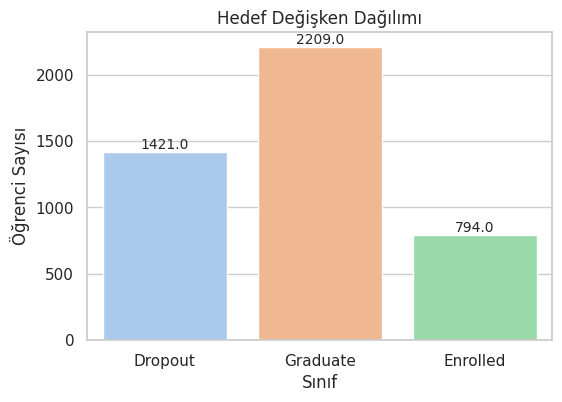

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Target', palette='pastel')
plt.title("Hedef Değişken Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Öğrenci Sayısı")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-86-9238e43acd57>:5: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


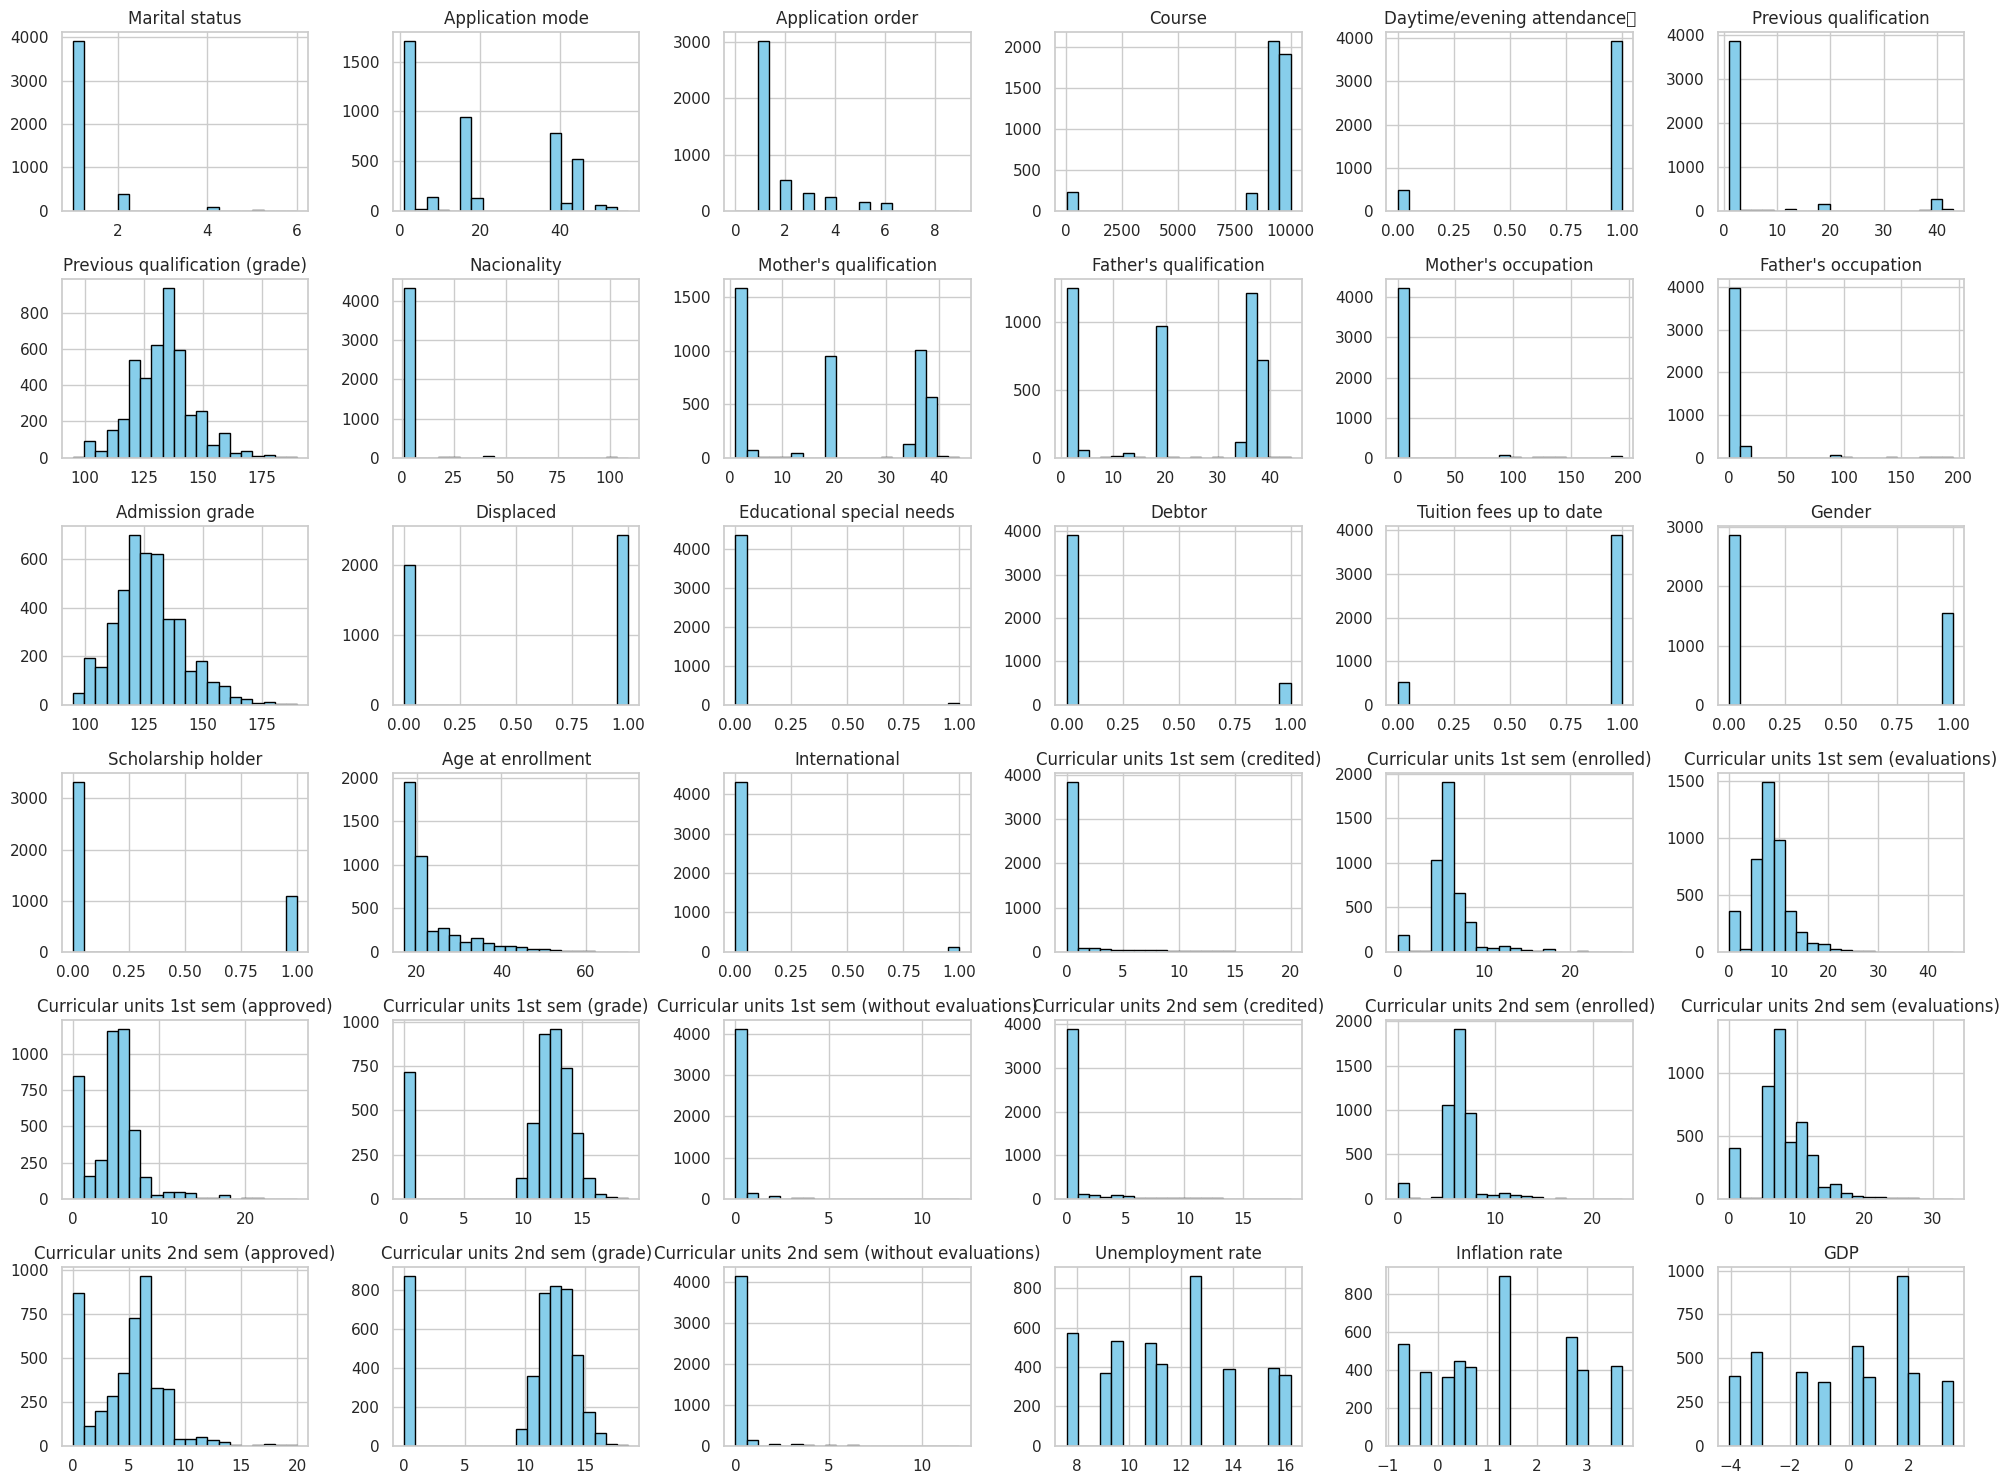

In [ ]:
# Değişkenlerin histogram grafiği
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


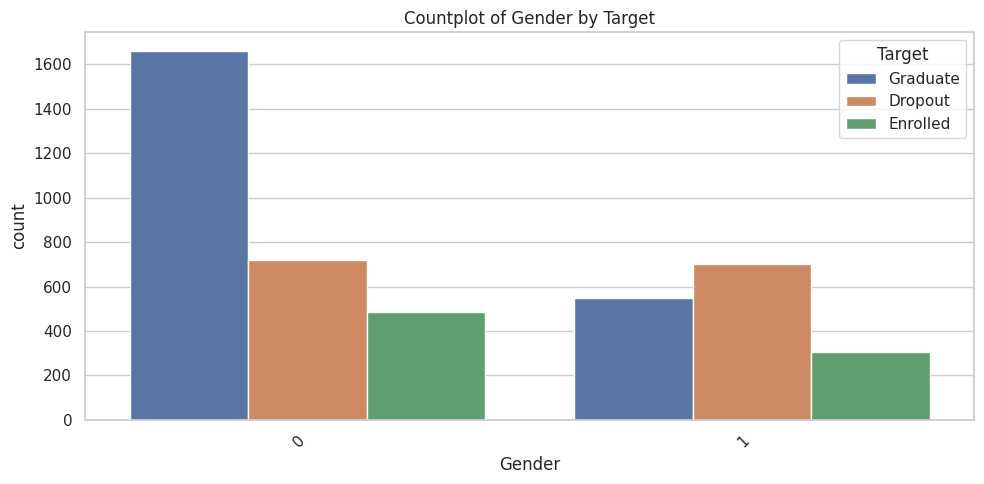

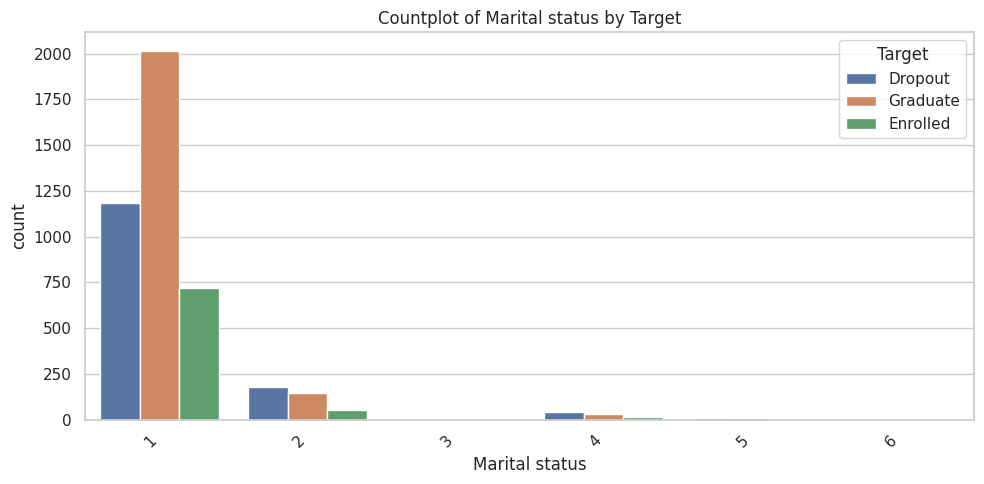

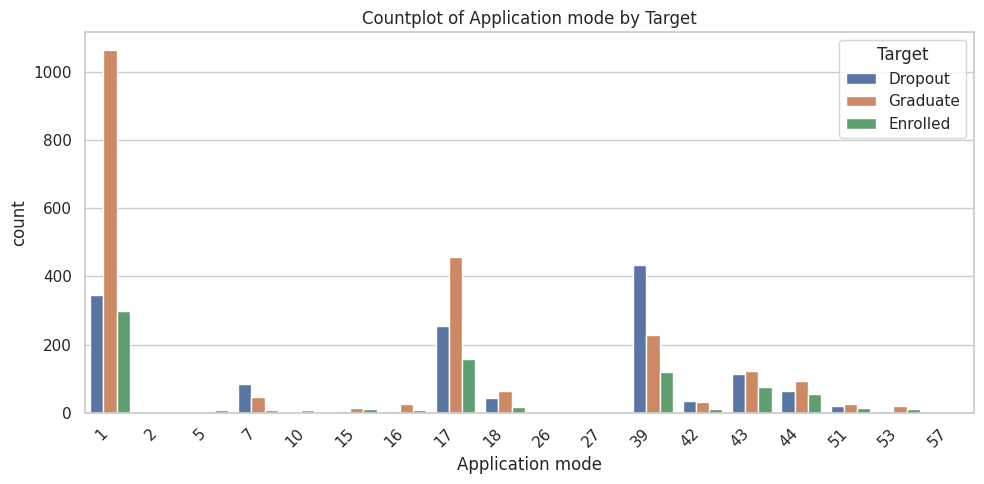

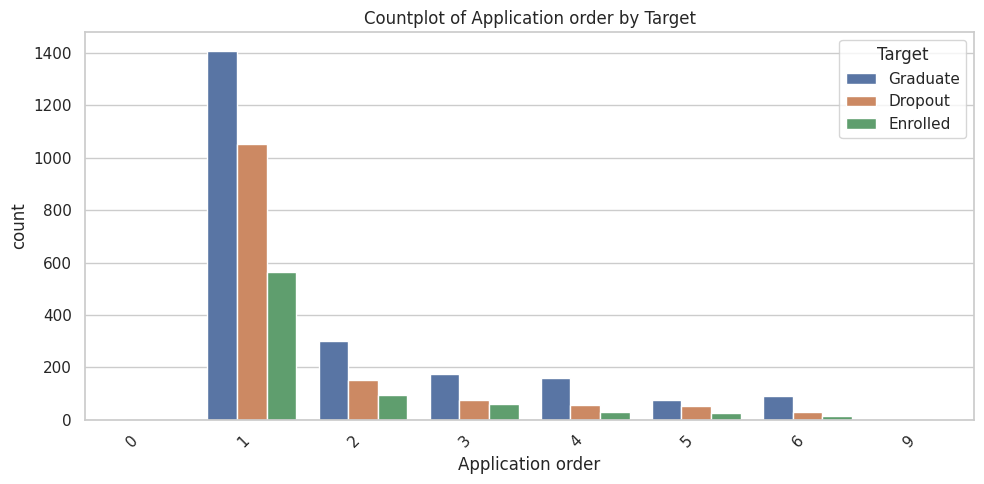

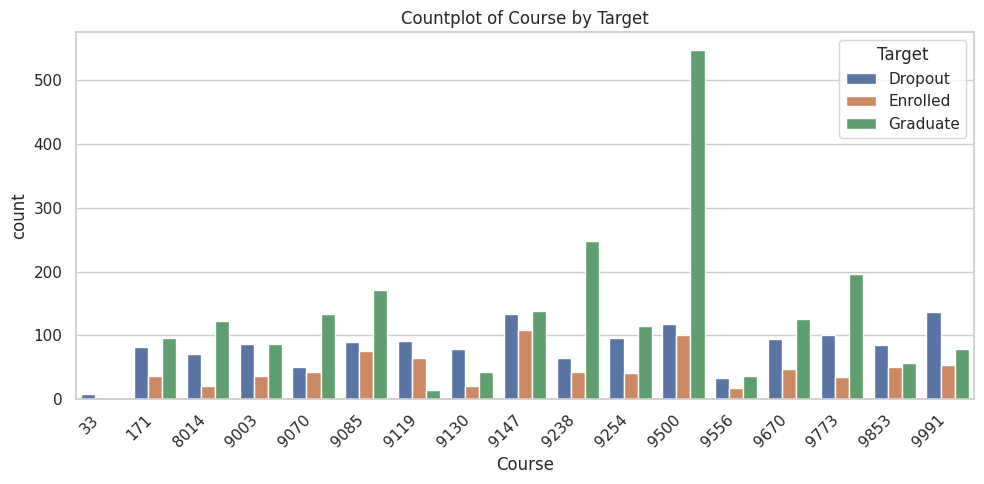

<ipython-input-16-5c7d0ceaf4f1>:31: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


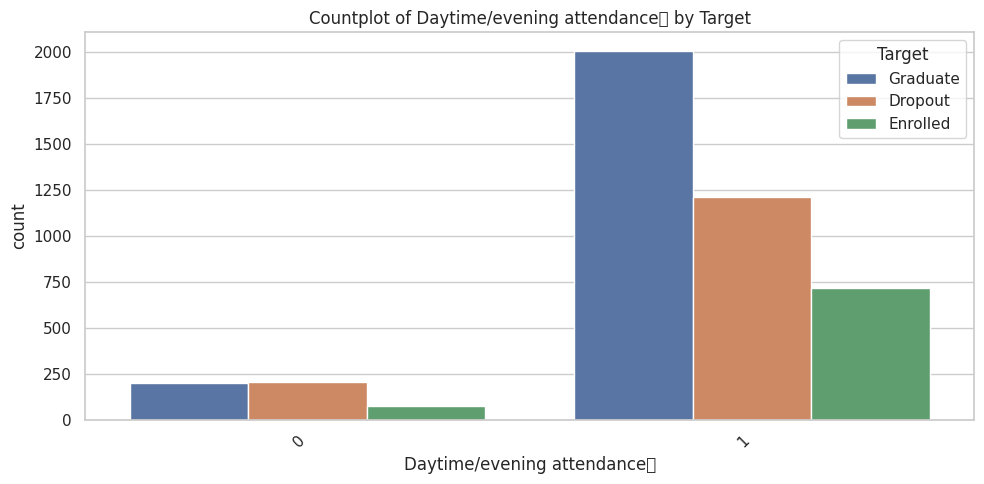

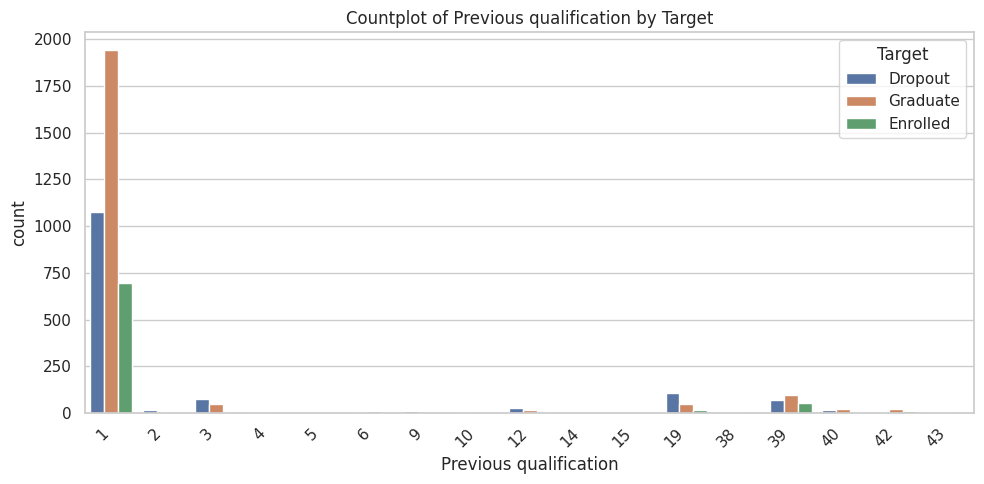

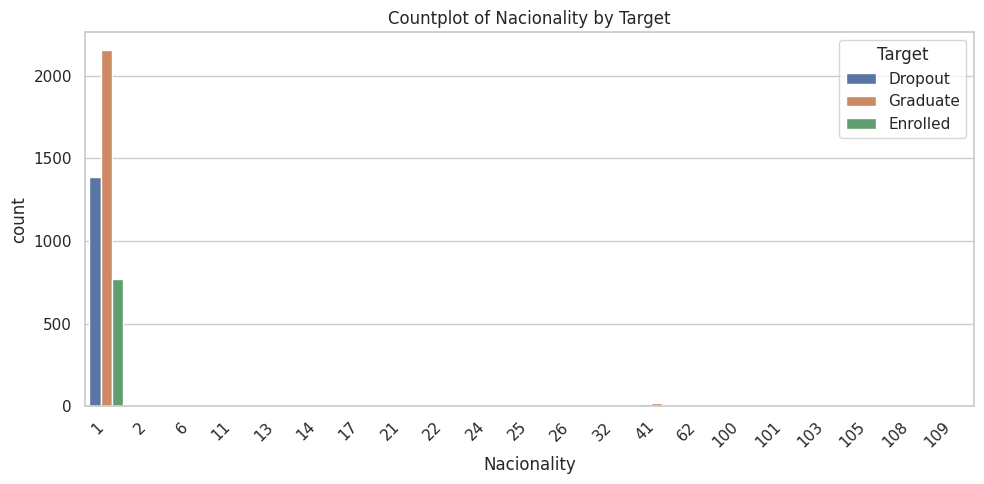

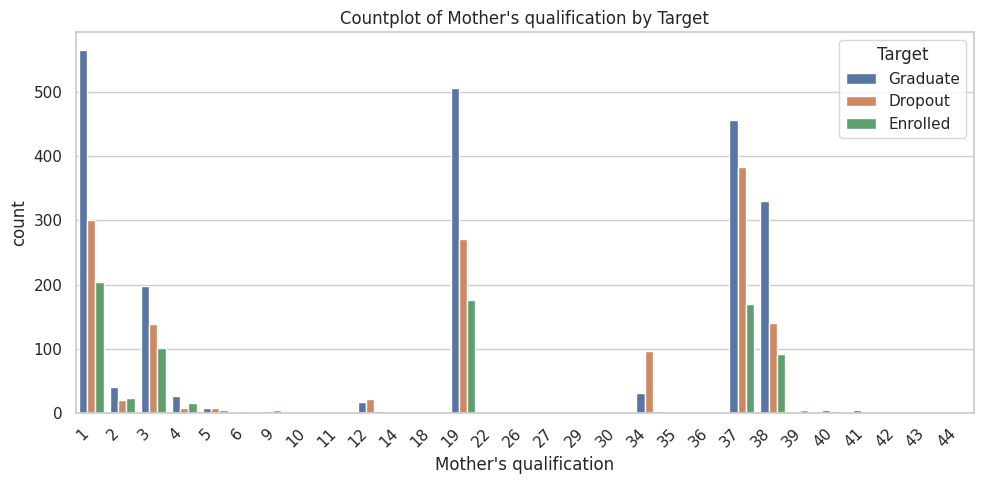

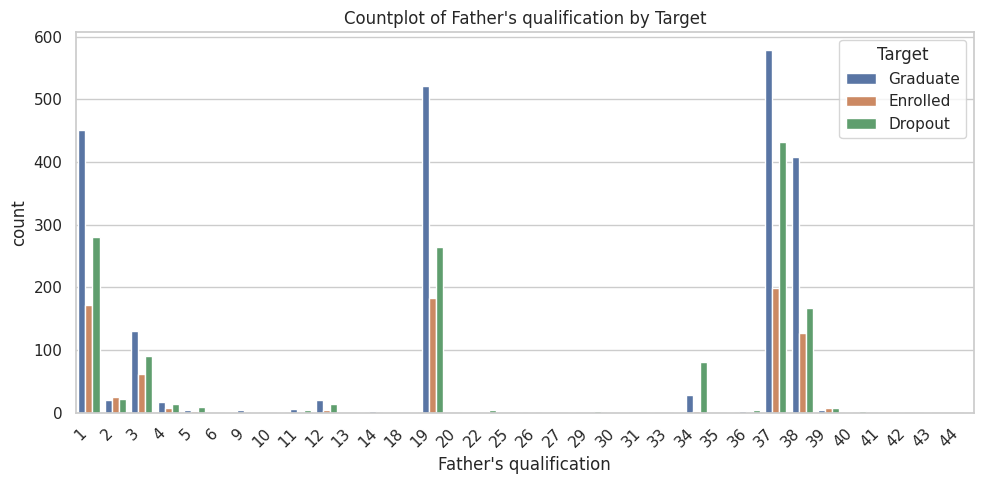

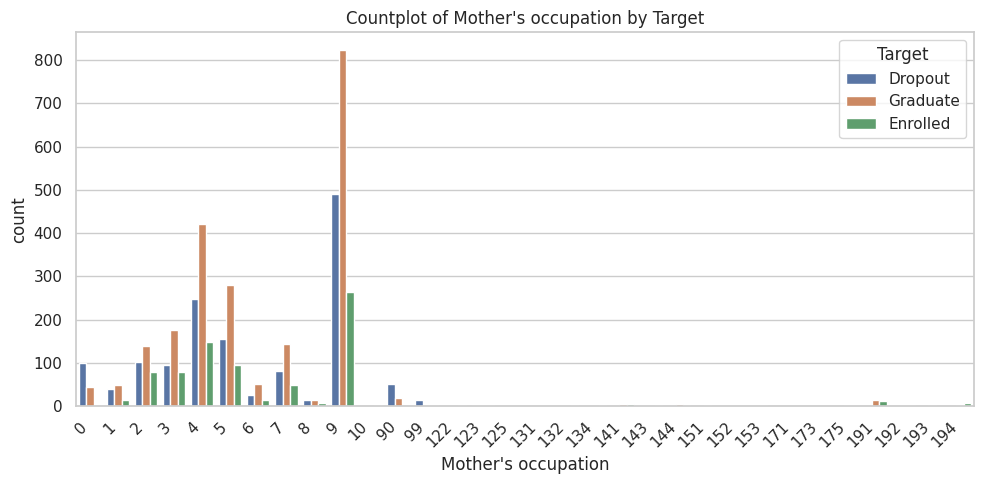

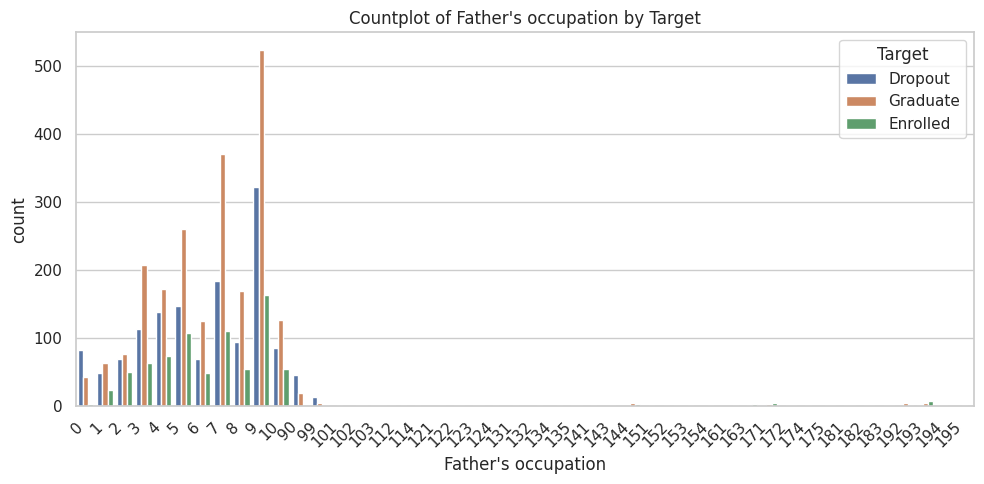

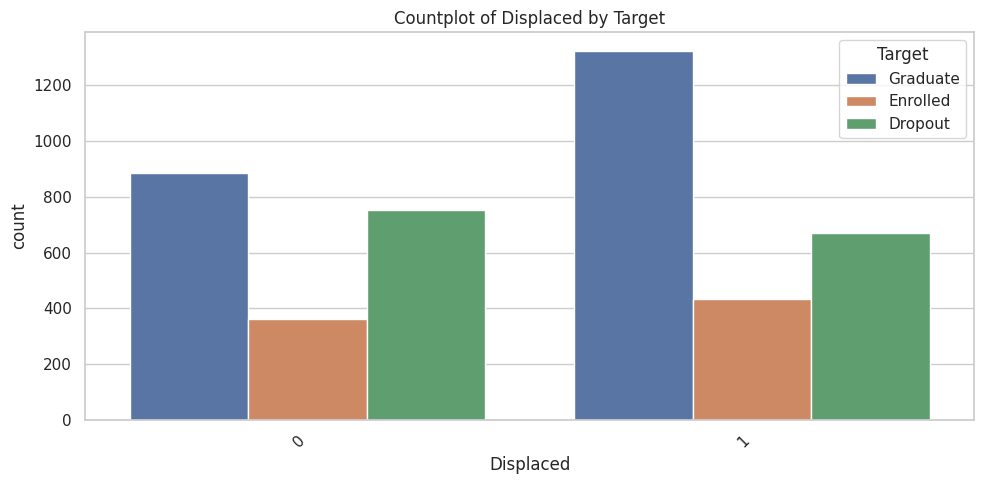

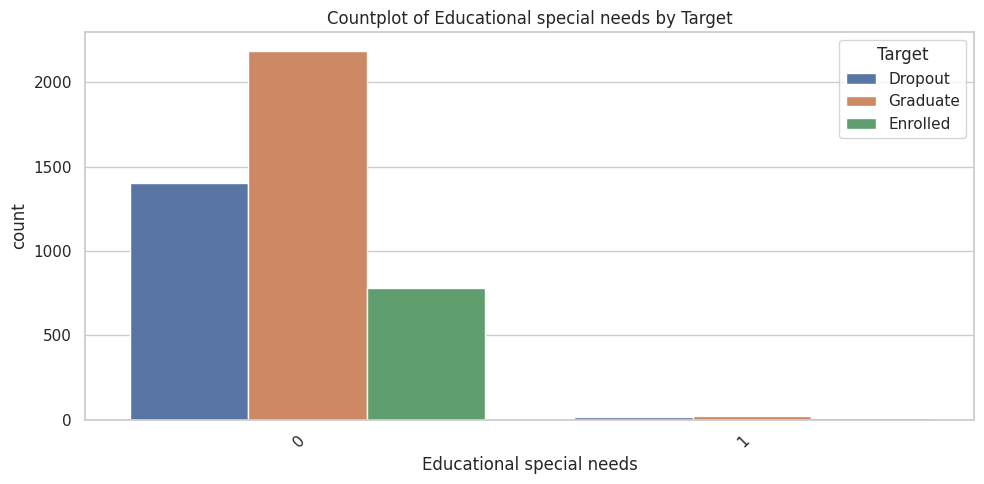

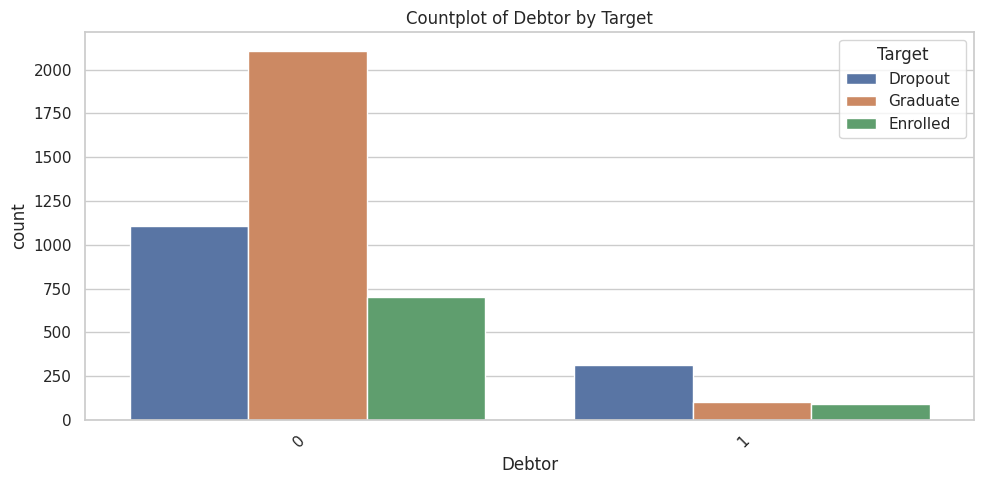

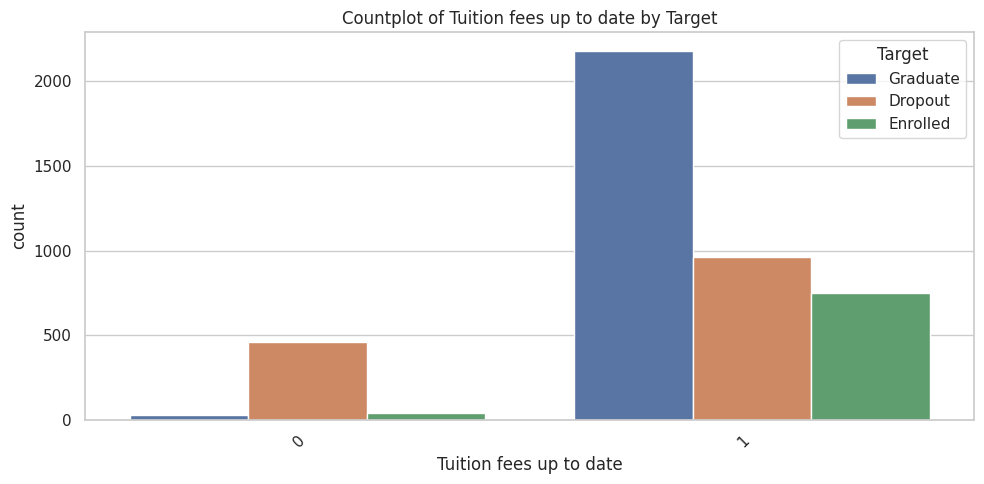

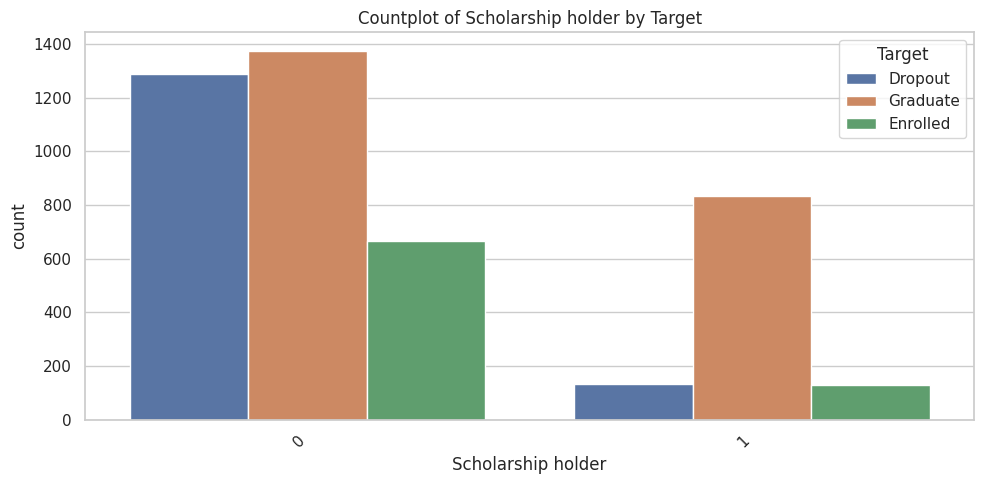

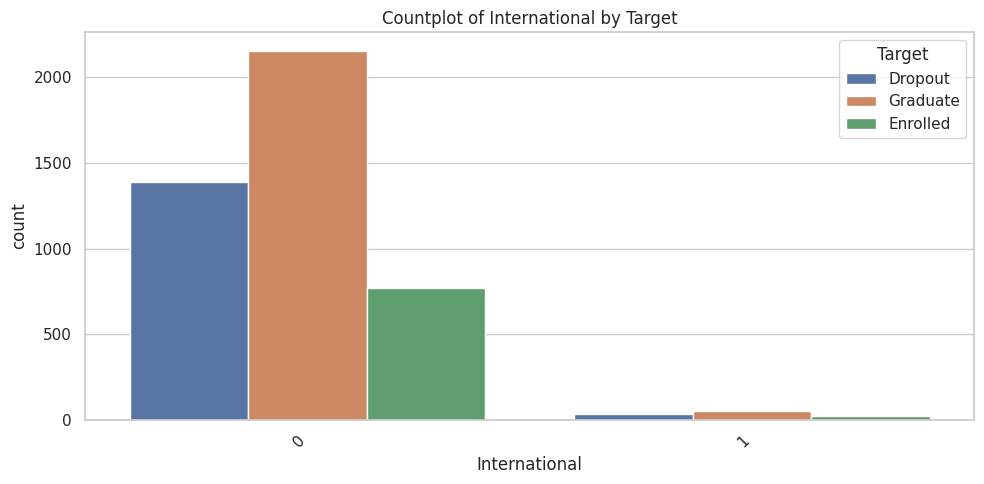

In [ ]:
# Kategorik verilerin Target özelliğine göre countplot ile görselleştirilmesi
# Dikkat! Bu veriler daha öncesinde encoding uygulandığı için int veya float formatında gözüküyor olabilir. Ancak bu veriler kategorik oldğu için boxplot ile gösterim
# yapılmak yerine barplot/countplot ile görselleştirme yapılmalıdır.
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = [
    'Gender',
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'International'
]

for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=feature, hue='Target')
    plt.title(f'Countplot of {feature} by Target')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target')
    plt.tight_layout()
    plt.show()


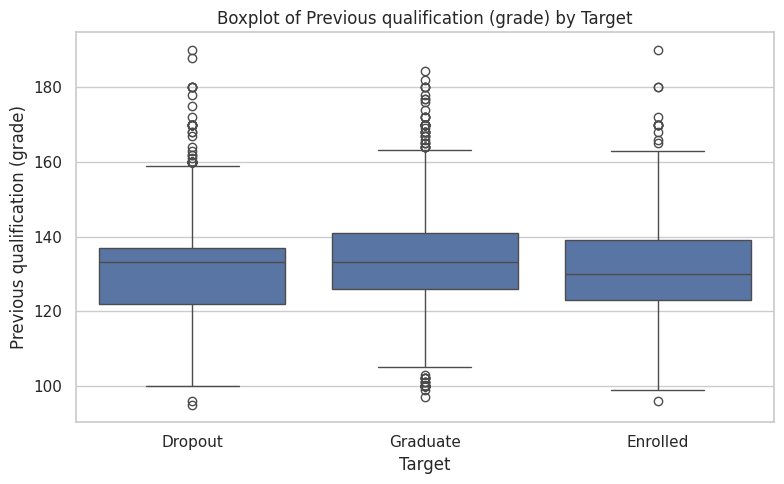

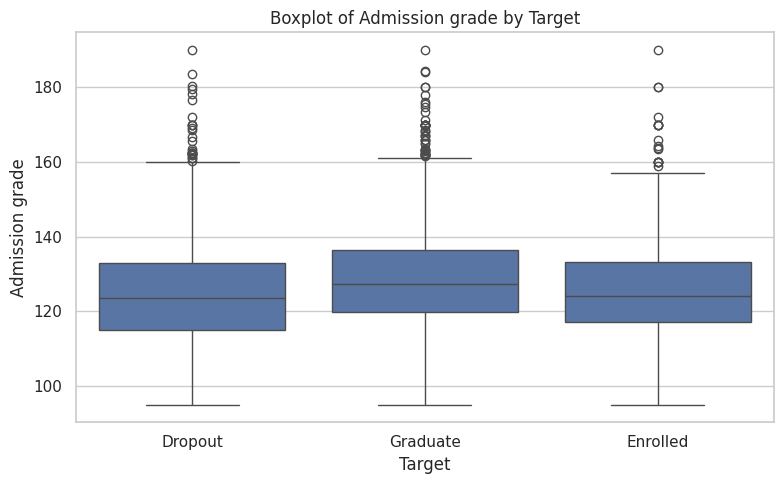

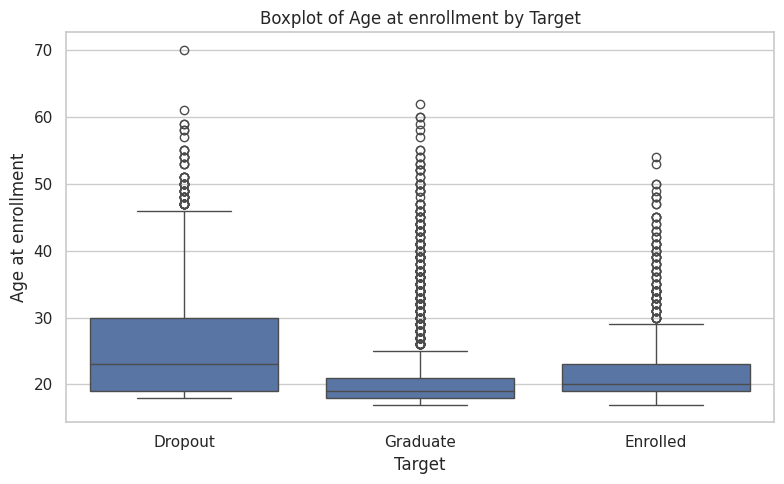

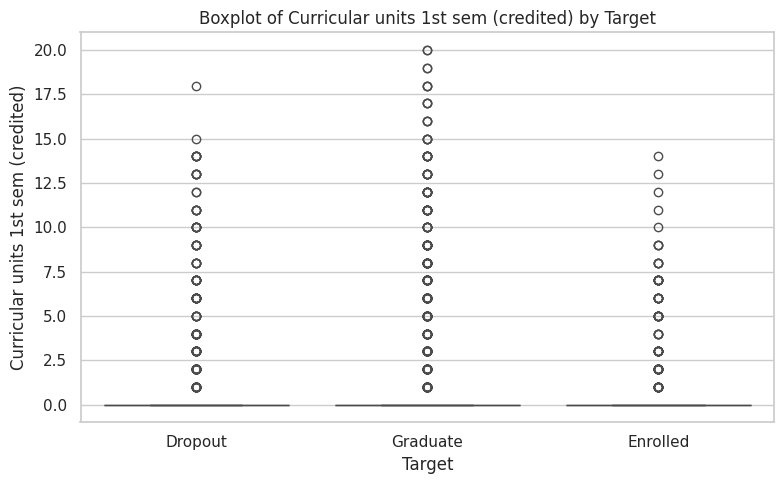

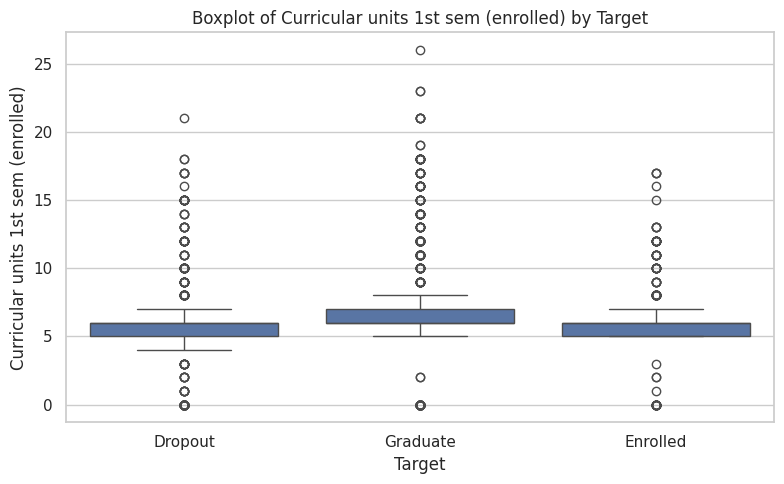

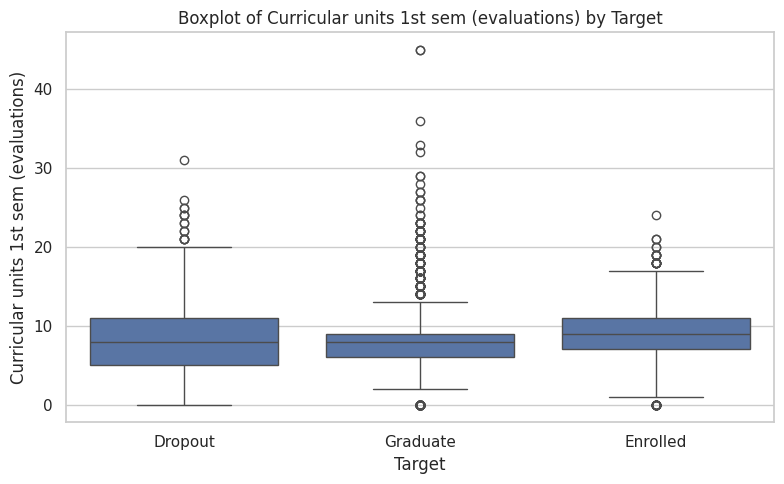

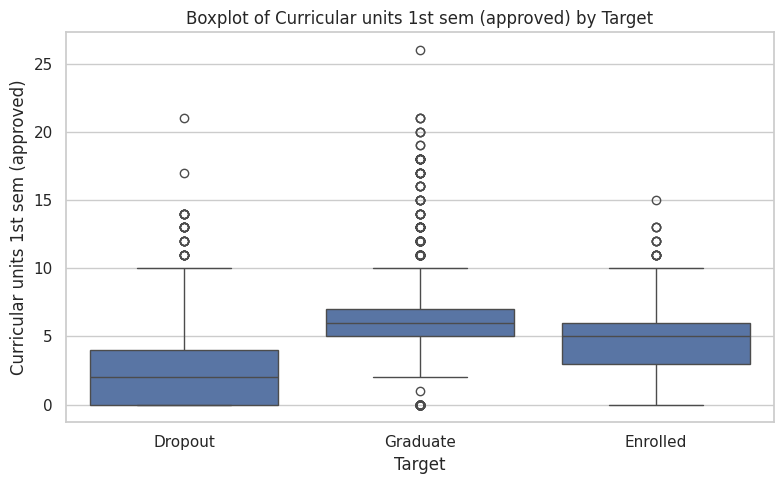

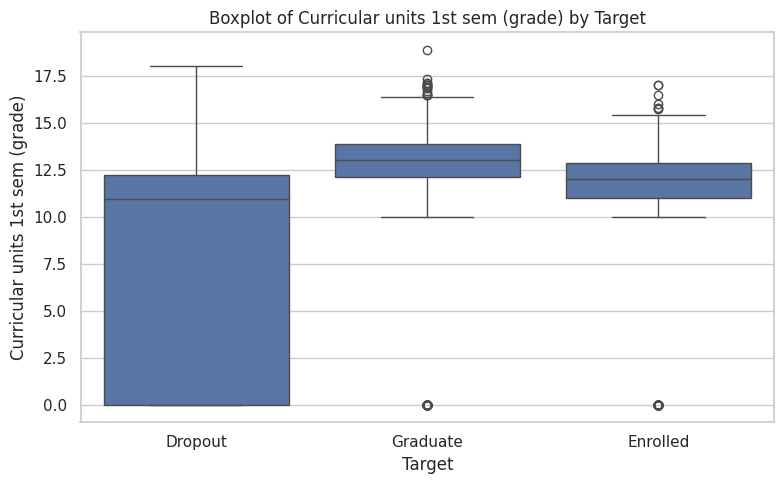

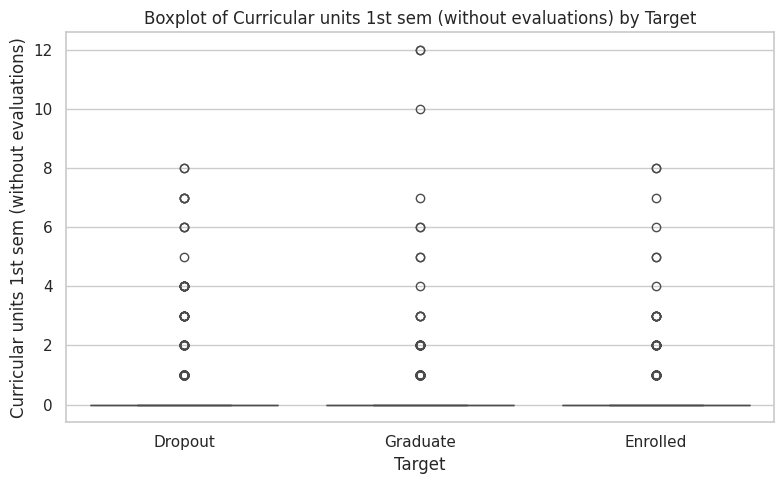

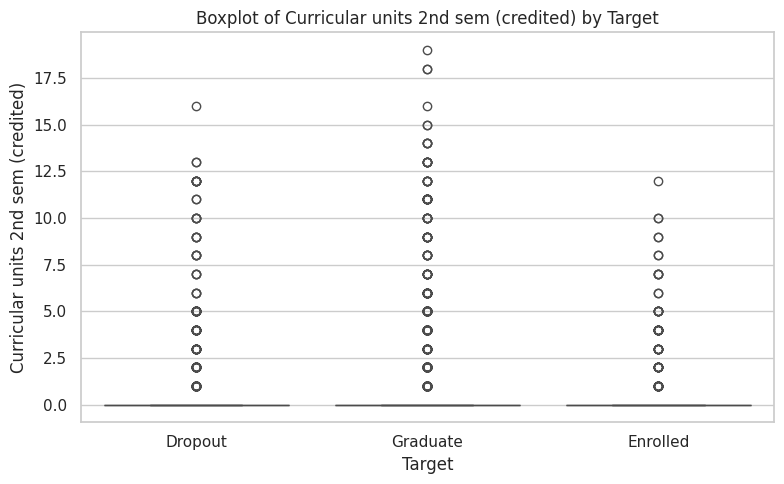

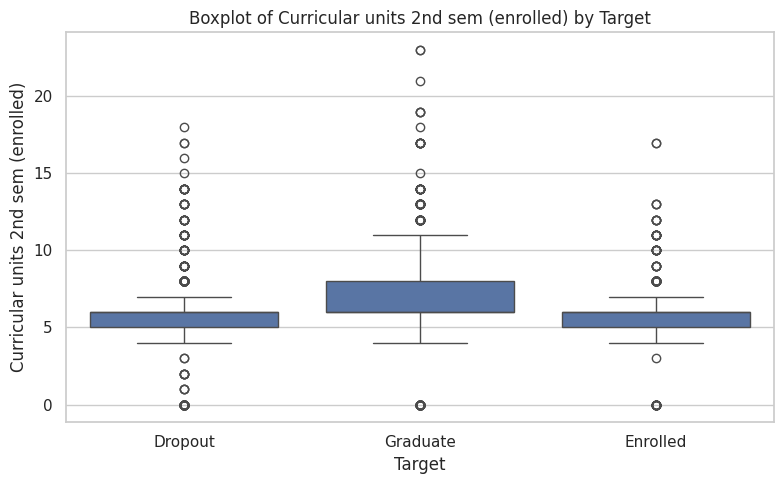

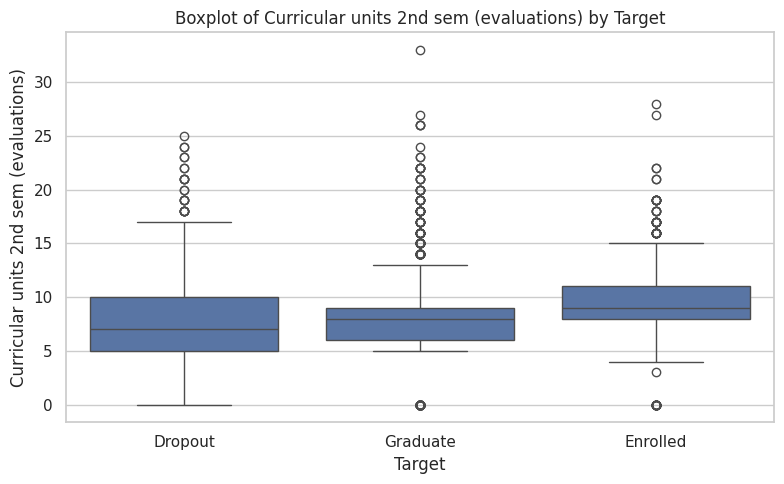

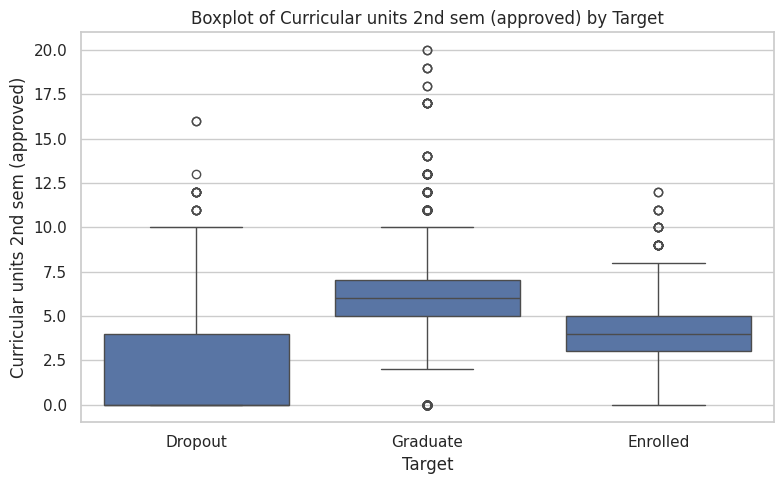

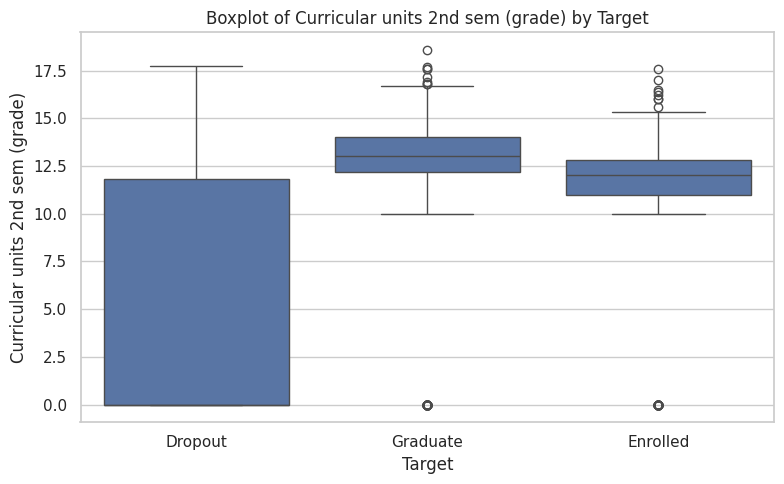

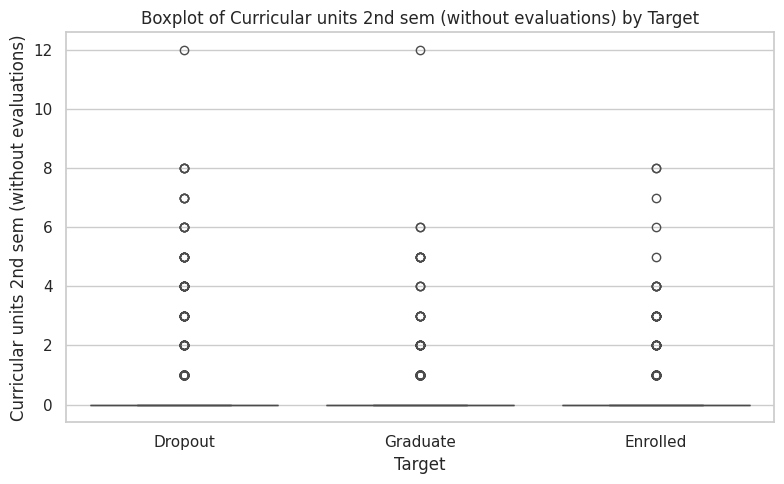

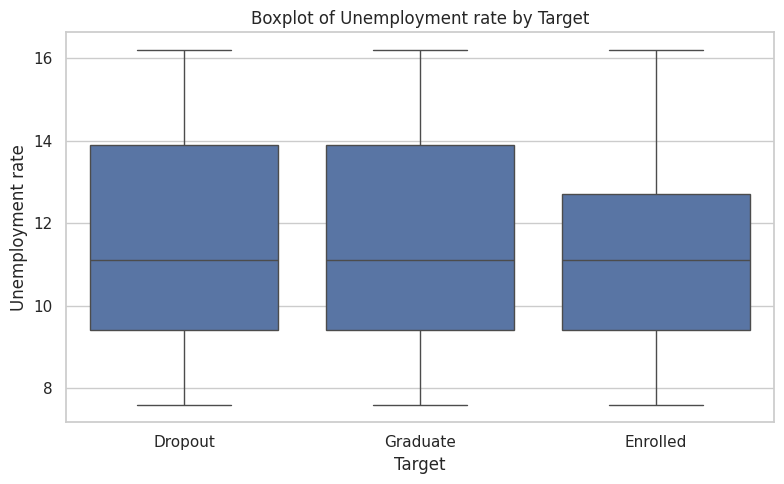

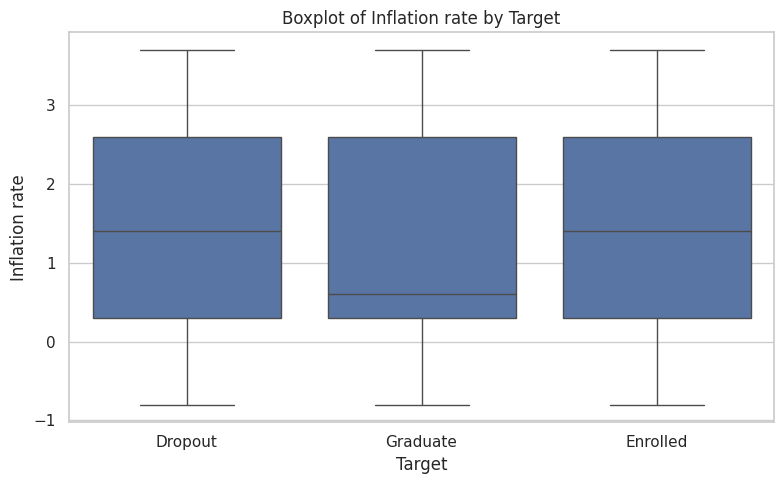

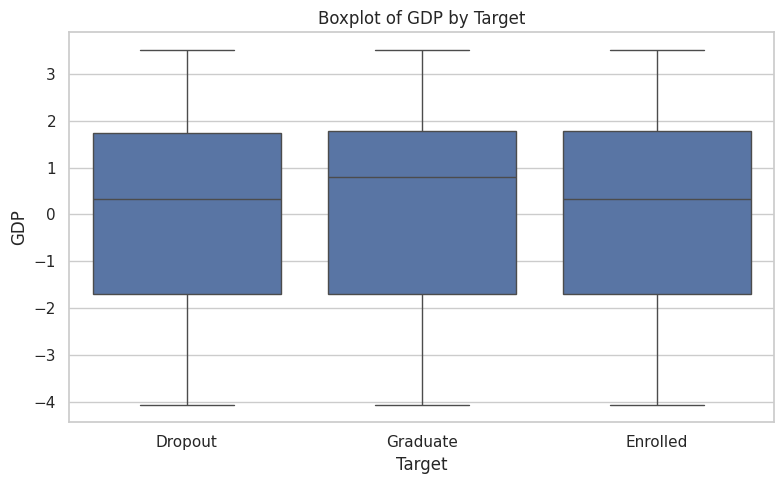

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal özelliklerin boxplot ile görselleştirilmesi
numeric_features = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

for feature in numeric_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Target', y=feature)
    plt.title(f'Boxplot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [4]:
# Bu aşamada 'Target' değişkeni için encoding işlemi uyguluyoruz.Veri setinin içinde başka kategorik veriler de bulunuyor ancak bunlar daha öncesinde sayısallaştırıldığı için
# bu özelliklere encoding işlemi uygulamıyoruz.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Target'])

# Kodlama sonucu
# Graduate → 0
# Dropout  → 1
# Enrolled → 2

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


**Veri Bölme ve Model Kurulumu**

**DECISION TREE MODELİ**

In [5]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier modelini oluşturma ve eğitme
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = clf.predict(X_test)
# Sonuçları yazdırıyoruz
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6768361581920904
[[201  69  46]
 [ 35  62  54]
 [ 40  42 336]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       316
           1       0.36      0.41      0.38       151
           2       0.77      0.80      0.79       418

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.69      0.68      0.68       885



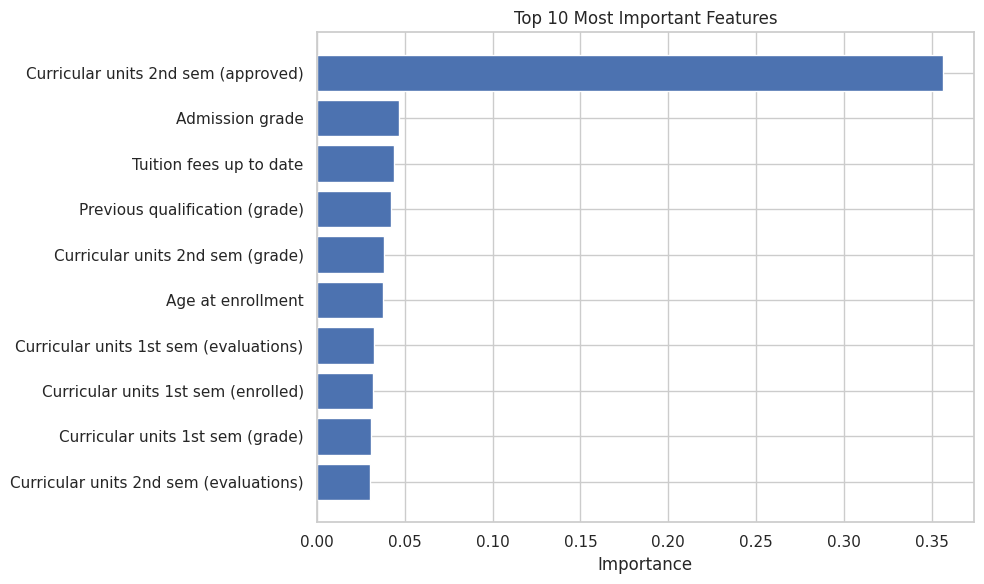

                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.356199
12                         Admission grade    0.046509
16                 Tuition fees up to date    0.043740
6           Previous qualification (grade)    0.042306
31        Curricular units 2nd sem (grade)    0.038275
19                       Age at enrollment    0.037593
23  Curricular units 1st sem (evaluations)    0.032376
22     Curricular units 1st sem (enrolled)    0.031806
25        Curricular units 1st sem (grade)    0.030892
29  Curricular units 2nd sem (evaluations)    0.030004


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Özellik isimleriyle birlikte önemleri dataframe olarak gösteriyoruz
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Önem sırasına göre sırala
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# En önemli 10 özelliği görselleştir
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# İlk birkaç önemli özelliği yazdır
print(feature_importances.head(10))


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Hedef değişkeni ve bağımsız değişkenleri ayırırken Target_encoded ve hedef değişkenleri çıkarıyoruz
X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi eğitim ve test olarak %70 - %30 olacak şekilde bölüyoruz, sınıfların oranı korunuyor (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Decision Tree sınıflandırıcı oluşturuyoruz
clf = DecisionTreeClassifier(
    criterion='gini',     # impurity ölçütü: 'gini'
    max_depth=5,          # ağacın maksimum derinliği
    random_state=42
)

# Modeli eğitim verisi ile eğitiyoruz
clf.fit(X_train, y_train)

# Test verisi ile tahmin yapıyoruz
y_pred = clf.predict(X_test)

# Sonuçları yazdırıyoruz
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7432228915662651
[[285  52  90]
 [ 39  58 141]
 [ 13   6 644]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       427
           1       0.50      0.24      0.33       238
           2       0.74      0.97      0.84       663

    accuracy                           0.74      1328
   macro avg       0.69      0.63      0.64      1328
weighted avg       0.73      0.74      0.72      1328



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Hedef değişkeni ve bağımsız değişkenleri ayırırken Target_encoded ve hedef değişkenleri çıkarıyoruz
X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi eğitim ve test olarak %70 - %30 olacak şekilde bölüyoruz, sınıfların oranı korunuyor (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Decision Tree sınıflandırıcı oluşturuyoruz
clf = DecisionTreeClassifier(
    criterion='entropy',     # impurity ölçütü: 'entropi'
    max_depth=5,          # ağacın maksimum derinliği
    random_state=42
)

# Modeli eğitim verisi ile eğitiyoruz
clf.fit(X_train, y_train)

# Test verisi ile tahmin yapıyoruz
y_pred = clf.predict(X_test)

# Sonuçları yazdırıyoruz
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7409638554216867
[[300  37  90]
 [ 59  40 139]
 [ 11   8 644]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       427
           1       0.47      0.17      0.25       238
           2       0.74      0.97      0.84       663

    accuracy                           0.74      1328
   macro avg       0.67      0.61      0.61      1328
weighted avg       0.71      0.74      0.71      1328



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Hedef değişkeni ve bağımsız değişkenleri ayırırken Target_encoded ve hedef değişkenleri çıkarıyoruz
X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi eğitim ve test olarak %70 - %30 olacak şekilde bölüyoruz, sınıfların oranı korunuyor (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Decision Tree sınıflandırıcı oluşturuyoruz
clf = DecisionTreeClassifier(
    criterion='gini',     # impurity ölçütü: 'gini'
    max_depth=4,          # ağacın maksimum derinliği
    random_state=42
)

# Modeli eğitim verisi ile eğitiyoruz
clf.fit(X_train, y_train)

# Test verisi ile tahmin yapıyoruz
y_pred = clf.predict(X_test)

# Sonuçları yazdırıyoruz
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7454819277108434
[[290  45  92]
 [ 41  58 139]
 [ 14   7 642]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       427
           1       0.53      0.24      0.33       238
           2       0.74      0.97      0.84       663

    accuracy                           0.75      1328
   macro avg       0.70      0.63      0.64      1328
weighted avg       0.73      0.75      0.72      1328



In [20]:
pip install imbalanced-learn

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # pip install imbalanced-learn

# Hedef ve bağımsız değişkenleri ayırıyoruz
X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi eğitim-test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# SMOTE ile azınlık sınıfını çoğaltma (sadece eğitim verisine)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Model oluşturma ve eğitme (max_depth=4)
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
clf.fit(X_train_res, y_train_res)

# Test setiyle tahmin yapma
y_pred = clf.predict(X_test)

# Sonuçları yazdırma
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6551204819277109
[[263 121  43]
 [ 38 154  46]
 [ 11 199 453]]
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       427
           1       0.32      0.65      0.43       238
           2       0.84      0.68      0.75       663

    accuracy                           0.66      1328
   macro avg       0.67      0.65      0.63      1328
weighted avg       0.75      0.66      0.68      1328



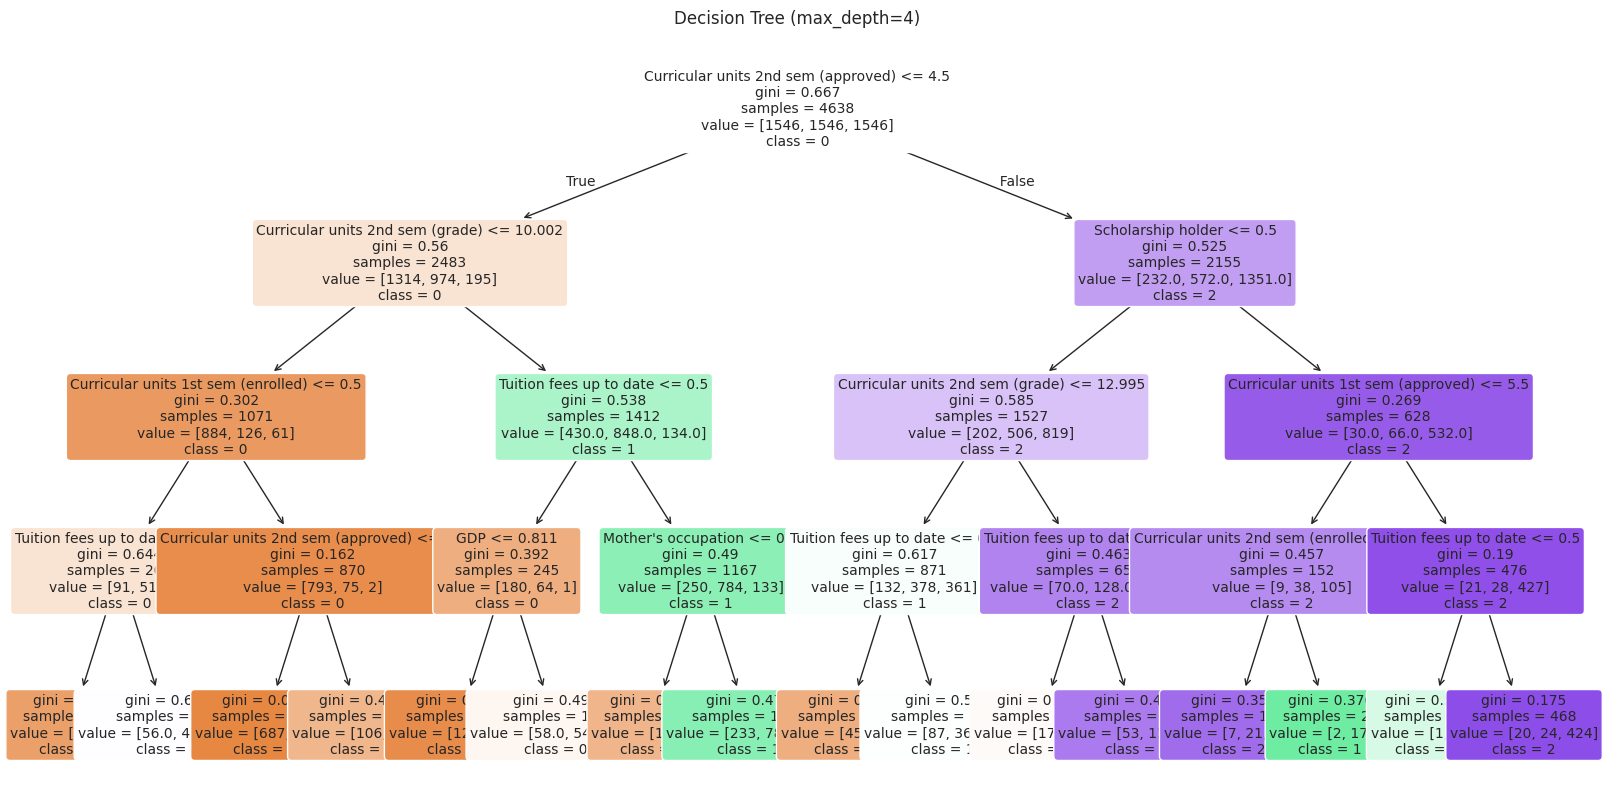

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ağacı görselleştirme
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in clf.classes_],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=4)")
plt.show()


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import scipy.stats as st

# Özellikler ve hedef
X = df.drop(['Target_encoded','Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Eğitim-test bölme (Stratify ile)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# SMOTE ile eğitim verisini dengeleme
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Modeli oluşturma
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Cross-validation için stratified k-fold oluşturma
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Modeli SMOTE ile dengelenmiş eğitim verisi ile eğit ve test seti üzerinde test etme
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Güven aralığı için manuel bootstrap yöntemi

from sklearn.utils import resample

n_bootstraps = 1000
rng = np.random.RandomState(42)
bootstrapped_scores = []

for i in range(n_bootstraps):
    # Test setinden bootstrap örneklemi al
    indices = rng.randint(0, len(X_test), len(X_test))
    X_test_boot = X_test.iloc[indices]
    y_test_boot = y_test.iloc[indices]

    # Tahmin yap
    y_pred_boot = clf.predict(X_test_boot)

    # Doğruluk hesapla
    score = accuracy_score(y_test_boot, y_pred_boot)
    bootstrapped_scores.append(score)

bootstrapped_scores = np.array(bootstrapped_scores)
mean_acc = np.mean(bootstrapped_scores)
conf_int = st.t.interval(confidence=0.95, df=len(bootstrapped_scores)-1,
                        loc=mean_acc,
                        scale=st.sem(bootstrapped_scores))


print(f"Bootstrap Mean Accuracy: {mean_acc:.4f}")
print(f"95% Confidence Interval for Accuracy: ({conf_int[0]:.4f}, {conf_int[1]:.4f})")


Accuracy: 0.6551204819277109
Bootstrap Mean Accuracy: 0.6552
95% Confidence Interval for Accuracy: (0.6544, 0.6560)


**RANDOM FOREST MODELİ**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Özellikler ve hedef değişken
X = df.drop(['Target_encoded', 'Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi %70 eğitim, %30 test olarak böl (sınıf oranını koru)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Random Forest sınıflandırıcı oluştur
clf = RandomForestClassifier(
    n_estimators=100,    # ağaç sayısı
    max_depth=4,      # derinlik sınırı
    random_state=42
)

# Modeli eğit
clf.fit(X_train, y_train)

# Test üzerinde tahmin yap
y_pred = clf.predict(X_test)

# Sonuçları yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7417168674698795
[[332   4  91]
 [ 94   9 135]
 [ 17   2 644]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       427
           1       0.60      0.04      0.07       238
           2       0.74      0.97      0.84       663

    accuracy                           0.74      1328
   macro avg       0.70      0.60      0.56      1328
weighted avg       0.72      0.74      0.68      1328



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Özellikler ve hedef değişken
X = df.drop(['Target_encoded', 'Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Veriyi %70 eğitim, %30 test olarak böl (sınıf oranını koru)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# SMOTE ile eğitim verisini dengele
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Random Forest sınıflandırıcı oluştur
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=4
)

# Modeli SMOTE ile dengelenmiş veride eğit
clf.fit(X_train_smote, y_train_smote)

# Test üzerinde tahmin yap
y_pred = clf.predict(X_test)

# Sonuçları yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.733433734939759
[[271 108  48]
 [ 33 145  60]
 [ 18  87 558]]
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       427
           1       0.43      0.61      0.50       238
           2       0.84      0.84      0.84       663

    accuracy                           0.73      1328
   macro avg       0.70      0.70      0.69      1328
weighted avg       0.77      0.73      0.74      1328



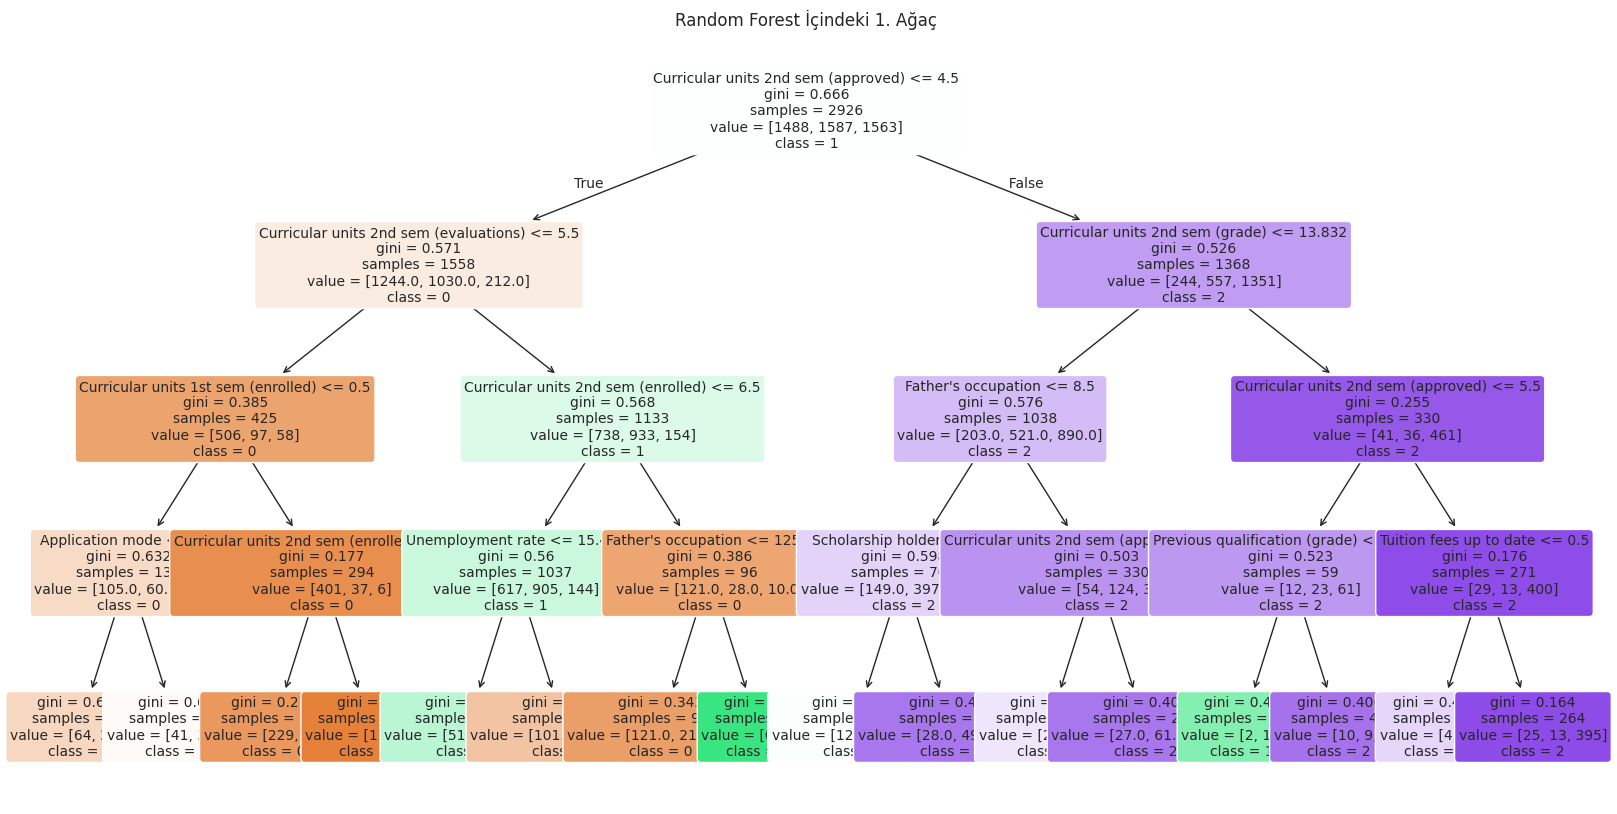

In [9]:
from sklearn.tree import plot_tree

# İlk ağacı çiz (clf.estimators_ listesinden)
plt.figure(figsize=(20, 10))
plot_tree(
    clf.estimators_[0],
    feature_names=X.columns,
    class_names=[str(cls) for cls in clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Random Forest İçindeki 1. Ağaç")
plt.show()


In [51]:
# Eğitim setinde tahmin ve skor
y_train_pred = clf.predict(X_train_smote)
train_acc = accuracy_score(y_train_smote, y_train_pred)

# Test setinde skor
test_acc = accuracy_score(y_test, y_pred)

print(f"Eğitim seti doğruluğu: {train_acc:.4f}")
print(f"Test seti doğruluğu: {test_acc:.4f}")

if train_acc - test_acc > 0.1:
    print("UYARI: Modelde overfitting olabilir! (Eğitim skoru çok yüksek, test skoru düşük)")
else:
    print("Model overfitting yapmıyor ya da minimal overfitting var.")


Eğitim seti doğruluğu: 0.7460
Test seti doğruluğu: 0.7334
Model overfitting yapmıyor ya da minimal overfitting var.


In [46]:
import numpy as np
import scipy.stats as st

n_iterations = 1000  # Bootstrap iterasyon sayısı
bootstrapped_scores = []

rng = np.random.RandomState(42)  # Tekrarlanabilirlik için

for i in range(n_iterations):
    # Test setinden bootstrap örneklem (örnekler tekrar seçilebilir)
    indices = rng.choice(len(X_test), size=len(X_test), replace=True)
    X_test_boot = X_test.iloc[indices]
    y_test_boot = y_test.iloc[indices]

    # Tahmin yap
    y_pred_boot = clf.predict(X_test_boot)

    # Doğruluk skorunu hesapla
    score = accuracy_score(y_test_boot, y_pred_boot)
    bootstrapped_scores.append(score)

bootstrapped_scores = np.array(bootstrapped_scores)
mean_score = np.mean(bootstrapped_scores)
sem_score = st.sem(bootstrapped_scores)

# %95 güven aralığı (t-dağılımı ile)
conf_interval = st.t.interval(0.95, df=len(bootstrapped_scores)-1, loc=mean_score, scale=sem_score)

print(f"Bootstrap ile Accuracy ortalaması: {mean_score:.4f}")
print(f"%95 Güven aralığı: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")


Bootstrap ile Accuracy ortalaması: 0.7335
%95 Güven aralığı: (0.7328, 0.7342)


**XGBOOST MODELİ**

In [11]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Özellikler ve hedef değişken
X = df.drop(['Target_encoded', 'Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Eğitim-test verisi ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Eğitimi gerçekleştir
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred = xgb_model.predict(X_test)

# Performans çıktıları
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7801204819277109

Confusion Matrix:
 [[320  45  62]
 [ 49 101  88]
 [ 18  30 615]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8269    0.7494    0.7862       427
           1     0.5739    0.4244    0.4879       238
           2     0.8039    0.9276    0.8613       663

    accuracy                         0.7801      1328
   macro avg     0.7349    0.7005    0.7118      1328
weighted avg     0.7701    0.7801    0.7703      1328



In [12]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # SMOTE ekleniyor

# Özellikler ve hedef değişken
X = df.drop(['Target_encoded', 'Target'], axis=1, errors='ignore')
y = df['Target_encoded']

# Eğitim-test verisi ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# SMOTE uygulama (sadece eğitim verisine!)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# SMOTE ile dengelenmiş veriyle modeli eğit
xgb_model.fit(X_train_smote, y_train_smote)

# Test setiyle tahmin yap
y_pred = xgb_model.predict(X_test)

# Performans çıktıları
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.7650602409638554

Confusion Matrix:
 [[308  77  42]
 [ 38 142  58]
 [ 25  72 566]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8302    0.7213    0.7719       427
           1     0.4880    0.5966    0.5369       238
           2     0.8498    0.8537    0.8518       663

    accuracy                         0.7651      1328
   macro avg     0.7227    0.7239    0.7202      1328
weighted avg     0.7787    0.7651    0.7697      1328



In [13]:
import numpy as np
from sklearn.utils import resample

n_iterations = 1000  # bootstrap tekrar sayısı
n_size = len(X_test)
acc_scores = []

for i in range(n_iterations):
    # Test setinden bootstrap örneği oluştur (tekrar ile)
    X_test_resampled, y_test_resampled = resample(X_test, y_test, n_samples=n_size, random_state=42+i)

    # Tahmin yap
    y_pred_resampled = xgb_model.predict(X_test_resampled)

    # Accuracy hesapla
    acc = accuracy_score(y_test_resampled, y_pred_resampled)
    acc_scores.append(acc)

# Güven aralığı
alpha = 0.95
p_lower = ((1.0 - alpha) / 2.0) * 100
p_upper = (alpha + ((1.0 - alpha) / 2.0)) * 100
lower = np.percentile(acc_scores, p_lower)
upper = np.percentile(acc_scores, p_upper)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"{int(alpha*100)}% Bootstrap Confidence Interval for Accuracy: [{lower:.4f}, {upper:.4f}]")


Accuracy: 0.7651
95% Bootstrap Confidence Interval for Accuracy: [0.7440, 0.7877]


In [25]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


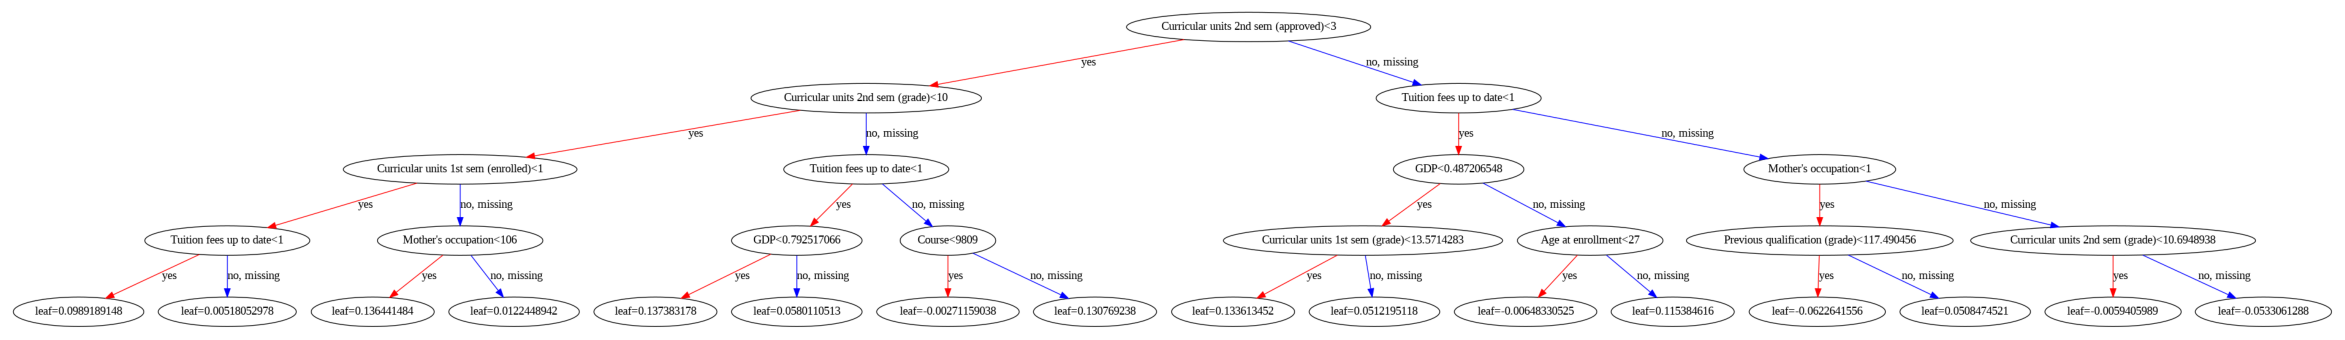

In [ ]:
from xgboost import to_graphviz
from PIL import Image
import matplotlib.pyplot as plt


dot = to_graphviz(xgb_model, num_trees=0, rankdir='TB')

dot.format = 'png'
dot.render('xgb_tree')


img = Image.open('xgb_tree.png')
plt.figure(figsize=(30, 30))
plt.imshow(img)
plt.axis('off')
plt.show()